In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys

sys.path.insert(0, "../build/src/main/pygnc")
import pygnc

In [38]:
ri, rj, rk = 0.0, -637.8245, 7653.894
vi, vj, vk = 8.694, 0.79036, 1.58073

In [39]:
# setup simulation
x0 = np.array([ri, rj, rk, vi, vj, vk])

h, t0, t_max = 100.0, 0.0, 86400.0
t = np.linspace(t0, t_max, int((t_max - t0) / h))

# execute simulation
x = pygnc.twobody_sim(x0, h, t0, t_max)

# Orbit simulation - Two Body Problem
### Earth orbiting satellite
#### <a href="https://github.com/aaronknudtson/gnclib" target="_blank">Underlying C++ Source code</a>
#### <a href="https://github.com/aaronknudtson/gnclib/blob/master/notebooks/orbit_twobody.ipynb" target="_blank">Jupyter Notebook Source code</a>

In [42]:
def plot_earth(ax):
    N=50
    stride=1
    u = np.linspace(0, 2 * np.pi, N)
    v = np.linspace(0, np.pi, N)
    x = 6378 * np.outer(np.cos(u), np.sin(v))
    y = 6378 * np.outer(np.sin(u), np.sin(v))
    z = 6378 * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, linewidth=0.0, cstride=stride, rstride=stride)
def get_lim(x):
    mi = min(min(x[0, :]), min(x[1, :]), min(x[2, :]))
    ma = max(max(x[0, :]), max(x[1, :]), max(x[2, :]))
    return (mi, ma)

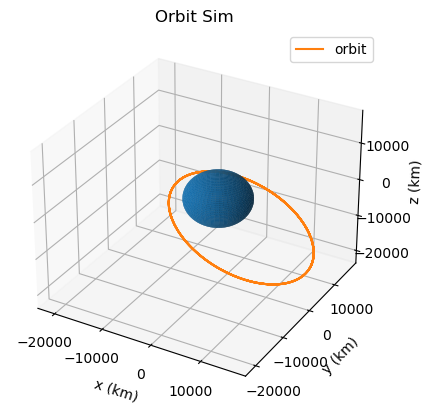

In [43]:
# plot simulation
ax = plt.figure().add_subplot(projection='3d')

plot_earth(ax)
lim = get_lim(x)
ax.plot(x[0, :], x[1, :], x[2, :], label="orbit")
ax.set(xlabel="x (km)", ylabel="y (km)", zlabel="z (km)", title="Orbit Sim", xlim=lim, ylim=lim, zlim=lim)
ax.legend()
ax.grid()

plt.show()